<a href="https://colab.research.google.com/github/Johyeonje/Deep_Learning_Thesis/blob/master/VGG16_Summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image

#VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION

#ABSTRACT

- 큰 사이즈의 이미지에 대한 학습에 있어서 3x3 크기의 아주 작은 컨볼루션 필터와 16 - 19의 깊은 가중치 층이 정확도에 미치는 영향에 대한 연구를 기술함

#1.INTRODUCTION

**Main Idea**    
- 3x3 사이즈의 작은 필터를 반복적으로 적용하여 점점 깊이가 깊은 레이어를 구성하는 구조에 대한 것

**Differentiation**
- ILSVRC에 비해 더 다양한 인식데이터셋에 적용이 가능
- 단순한 파이프라인의 일부로 사용될때 성능이 뛰어남

#2.CONVNET CONFIGURATIONS

##2.1 ARCHITECTURE

- Input Image : 244 x 244 사이즈, RGB 채널
- Preprocessing : 픽셀별 RGB 평균값 감소 연산
- Filter Size : 3 x 3 사이즈
- Stride : 1 픽셀
- Padding : 3 x 3 컨볼루션 필터당 1픽셀
- Max-pooling : 2 x 2 픽셀, 2 Stride
- Fully Connection Layer : 마지막 3개 층 ( 4096 채널 x 2, 1000 채널 x 1 )
 * 1000개의 이미지 구분을 위해 마지막 층은 1000개의 출력 노드
- Activation Function : ReLU, SoftMax ( 은닉층, 2개 FC층 : ReLU / 출력층 : SoftMax )

##2.2 CONFIGURATIONS

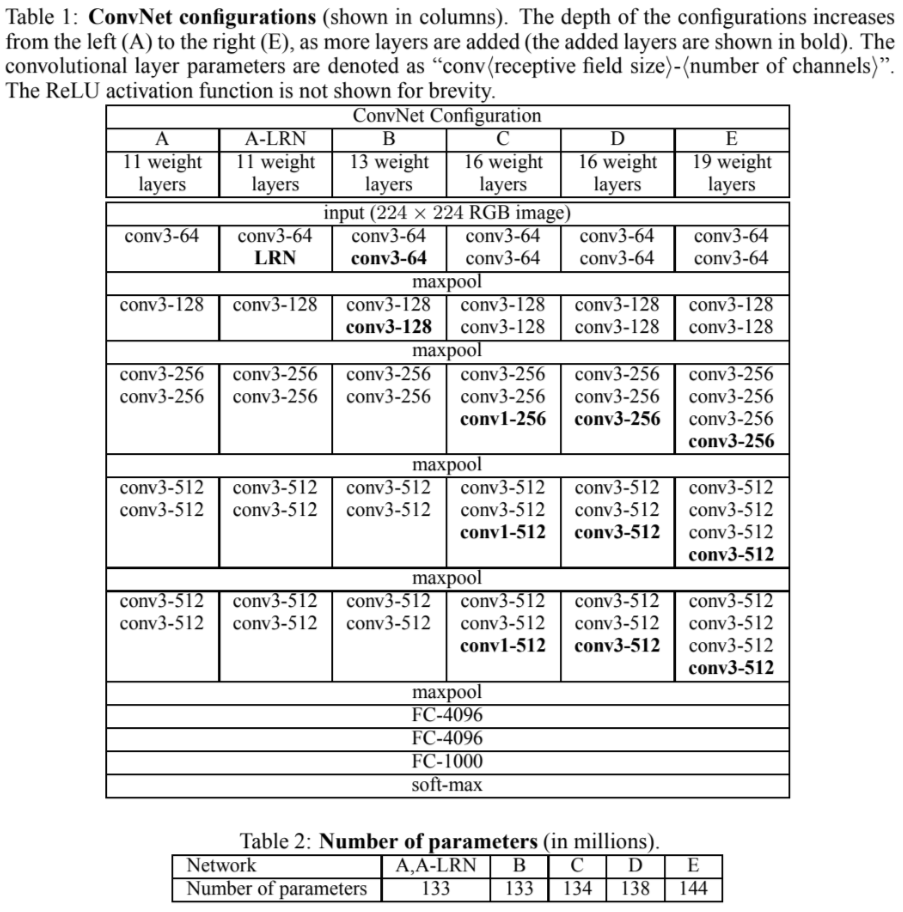

In [ ]:
Image('/content/drive/My Drive/DeepLearning/논문공부/VGG16/vgg16_architecture.png',width=600)

##2.3 DISCUSSION

**Main Idea**
- 5 x 5 필터가 단층으로 적용되는 범위(receptive field)는 3 x 3 필터가 2개 층이 적용된 범위와 같다.

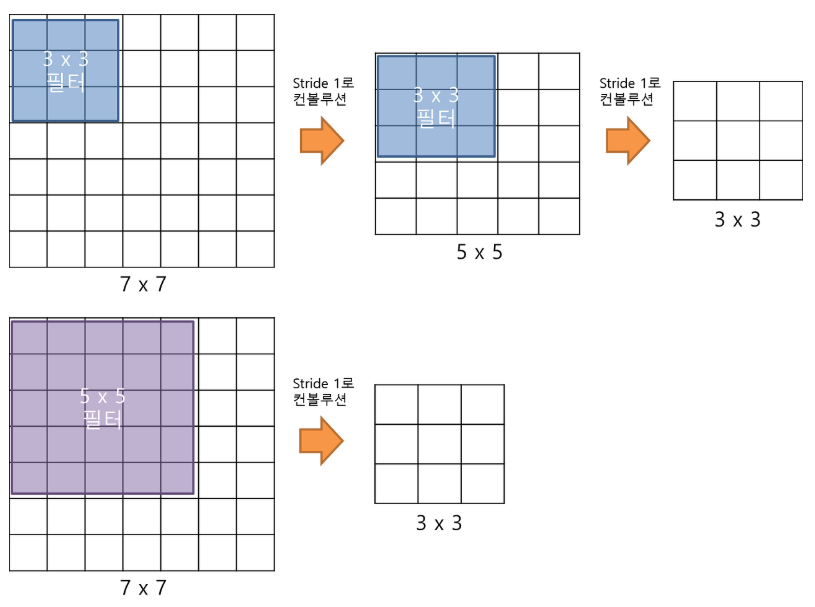

In [ ]:
Image('/content/drive/My Drive/DeepLearning/논문공부/VGG16/vgg16_explain_receptivefield.png',width=500)

- 하지만 이 두가지 필터 적용법은 파라미터 갯수에서 큰 차이를 보인다.    
 * 3 x 3 필터 2개의 파라미터 갯수 : $2 * (3^2) = 18$
  * 5 x 5 필터 1개의 파라미터 갯수 : $1 * (5^2) = 25$

- 7 x 7 필터 단층의 경우 3 x 3 필터 3개층의 적용 범위와 같은데 이 경우 파라미터가 더 큰 갯수 차이를 보인다.
 * 3 x 3 필터 3개의 파라미터 갯수 : $3 * (3^2) = 27$
 * 7 x 7 필터 1개의 파라미터 갯수 : $1 * (7^2) = 49$

* 이런 식으로 필터를 분리하는 것이 필터를 정규화하여 분해하는 효과가 있다(?)

* 구조 C에서 와 같이 1 x 1 필터를 적용하면 수용적 영역에 활성화 함수의 성능을 높이는 방법이 된다.

**Analogous Technique**
* 작은 필터를 사용한 점이 유사 (Ciresan et al.2011)
  * 하지만 층의 깊이가 VGG보다 훨씬 얕았고 ILSVRC의 큰 사이즈의 데이터셋에 대해 평가하지 않음   
    
* 작은 필터에 깊은 cnn 층을 사용한 점은 유사 (Goodfellow et al. 2014)
  * VGG에 비해구조가 훨씬 복잡
  * 형상 맵의 연산량을 줄이기 위해 첫 번째 층이 급격하게 감소

#3.CLASSIFICATION FRAMEWORK
* 본 모델에 대한 학습과 평가에 대한 세부사항

##3.1 TRAINNING

* 모델 학습의 전반적인 프로시저는 Krizhevsky et al. 2012 의 방식을 따르지만 멀티 스케일 크롭의 데이터 입력 방식은 참고하지 않는다.
    * Optimizer : 다항 로지스틱 회귀 분석
    * Batch size : 256
    * Momentum : 0.9(? 검증데이터를 0.1로 썼다는 말인가)
    * Nomalization : weight decay (? 이게 뭔교)
    * Dropout : 첫 번째, 두 번째 FC층
    * Learning late : 0.01 (정확도 향상 중지 시 1/10)
    * Learning late 감소 빈도 : 3 회
    * Epoch : 78 회
    * 절대적인 regularization(모델의 설명도를 유지하면서 모델의 복잡도를 줄이는 것)
    * 특정 레이어 초기화 기법으로 인한 낮은 epoch 요구량

**가중치 초기화**

잘못된 초기화는 학습시간을 지연시킬 수 있음.    
* A와 같이 얕은 구조로 무작위 초기화 학습을 진행
* 더 깊은 구조일 때 첫 4개의 컨볼루션 레이어와 마지막 3개의 FC를 사전 초기화 층으로 대체
* 초기화 단계에서는 learning late를 감소시키지 않음
* 무작위 초기화 가중치 : 평균 $0$, 분산 $10^{-2}$/ biases : 0
* 논문 제출 후에 Glorot & Bengio의 무작위 초기화를 통해 사전 학습이 필요없다는 걸 알았음.

**학습 이미지 사이즈**    
훈련 데이터양을 증가시키기 위해 무작위 수평 대칭과, RGB 값 변경을 적용했다.    
S 를 입력 이미지에서 잘려나온 최소 사이즈 학습 이미지라고 할 때   
* Crop 크기가 224*224로 고정되어 있는 동안 S는 224이상의 값이 될 수 있다.
* S가 224일 경우 Crop은 훈련 이미지의 가장 작은 면에 완전히 걸쳐 전체 이미지 통계적으로를 캡쳐한다(?)
* S가 224보다 큰 경우 Crop은 이미지의 작은 물체나 물체의 일부분에 해당한다.

**학습 이미지 S에 대한 두 가지 접근 방법**    
1. 작은 스케일의 훈련에 해당하게 S를 고정
  * 두 종류의 고정된 스케일로 평가함 : S = 256, 384
  * 첫 번째로 S = 256으로 컨볼루션 신경망을 학습함
  * S = 256을 사전학습으로 삼아 S = 384를 학습함
  * Learning late = 0.0001
2. 다중 스케일 학습
  * Smin 부터 Smax 사이에 랜덤한 값을 선정하여 부여
  * 이미지 안의 물체 사이즈가 모두 다르기 때문에 랜덤 선정이 학습 전체적으로 이득
  * 넓은 이미지에서 스케일 추상화를 통해 학습 데이터 증량 가능
  * 속도적인 이유로 동일한 구성의 단일 모델의 모든 레이어를 미세 조정하여 다중 모델 학습
  * 사전학습은 S = 384

##3.2 Testing

테스트에서의 학습 컨볼루션 신경망과 입력 데이터를 다음과 같이 분류
1. 작은 사이즈 이미지 측면에서의 사전정의를 위해 동위원소학적(?)으로 resize
  * 이를 Q라 표기하고 테스트 스케일에 참조한다. (앞에 나온 S별 성능 향상에 영향을 줌)
2. 그런 다음 신경망은 Sermanet et al. 2014 와 비슷하게 재조정된 테스트 이미지에 촘촘하게 적용
* 즉, FC 층은 처음 컨볼루션 층으로 변경된다.
  * 첫 번째 FC = 7x7 컨볼루션 레이어, 두 번째 FC = 1x1 컨볼루션 레이어
3. 결과적으로 완전 컨볼루션 신경망이 crop되지 않은 이미지 전체에 적용된다.

**결과**    
* 많은 수의 채널과 등급에 대한 점수로 매핑
* 다양한 공간 해상도는 입력 데이터에 의해 결정된다.
* 마지막으로, 이미지에 대한 클래스 점수의 고정 크기 벡터를 얻기 위해 공간 평균을 낸다.
  * 테스트 셋에도 수평 대칭을 통해 데이터 양 증가가 적용됨
* 소프트 맥스 결과의 평균으로 최종 점수 도출

* 테스트 단계에성 다중 crop을 사용하지 않음
    * 완전 컨볼루션 신경망을 전체 이미지에 적용하기 때문에 각 crop에 대해 가중치 재조정을 필요로 해서 효율성이 떨어짐
* 큰 사이즈의 crop 데이터 셋에는 Szegedy et al. 와 같이 완전 컨볼루션 신경망에 비해 입력 이미지 표본 추출이 더 정교해져 정확도가 향상될 수 있다.
* 다중 crop 평가는 서로 다른 컨볼루션 층의 경계 조건 때문에 따로 포착됨
  * 반면 VGG는 다중 crop의 계산 시간 증가가 잠재적으로도 정확도 증가를 정당화하지 않는다고 생각하지만 참고하기 위해 스케일당 50 crop씩 평가했음.

##3.3 IMPLEMENTATION DETAILS

카페 툴킷을 통해서 구현했음. 그런데 단일 시스템에 설치된 여러 GPU로 훈련과 평가가 가능함.
* 다중 크기에 대해 최대 크기 이미지의 평가와 학습이 잘 이루어짐
* 여러 GPU를 사용하면 데이터를 병렬적으로 잘 이용한다.
* 병렬적으로 학습 이미지가 batch 단위로 분배되어 계산된 기울기의 평균만큼 적용되어 단일 시스템와 결과가 같음
* 단일 GPU를 사용하는 것보다 3.75배 가량 빠름